Name: Shazia Zaman, Case Study: 2, Class: MSDS 7333-402

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import pandas_datareader as pdr
from datetime import datetime, date
import matplotlib.pylab as plt
from scipy.stats import percentileofscore
from collections import defaultdict
%matplotlib inline

## Initial Analysis

I have decided to compare the stocks for some of popular retail stores for last 10 years. List of stocks used in this report are following: Dillard's (DDS), Kohl's (KSS), Macys (M), Nordstorm (JWN), JCPenny (JCP)

In [3]:
#Initialize start and end date to capture stocks
start = datetime(2006,1,1)
end = date.today()

# Stock symbol list to include in the report
retail_symbol_list = ['DDS','KSS','M','JWN','JCP'] 
# S&P 500 stocks will be used later in the report for benchmark analysis
S_and_P = ['SPY']
stock_symbol_list = retail_symbol_list + S_and_P
#get stock data from yahoo finance
stocks = data.DataReader(stock_symbol_list, "yahoo", start, end)
type(stocks)

pandas.core.panel.Panel

In [4]:
# check types of reports and types
stocks.dtypes

Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object

In [5]:
#As the data return from yahoo finance is two dimensional by report type and stocks for four companies
#Choose to evaluate report for Adj Close

adj_close_px=stocks['Adj Close'][retail_symbol_list]
adj_close_px.head()

,DDS,KSS,M,JWN,JCP
Date,,,,,
2018-02-02,63.680000,63.470001,24.889999,47.849998,3.54
2018-02-01,66.120003,65.089996,25.620001,49.230000,3.61
2018-01-31,67.559998,64.769997,25.950001,49.310001,3.71
2018-01-30,66.559998,65.879997,26.250000,49.410000,3.74
2018-01-29,69.110001,67.949997,27.309999,50.889999,3.87


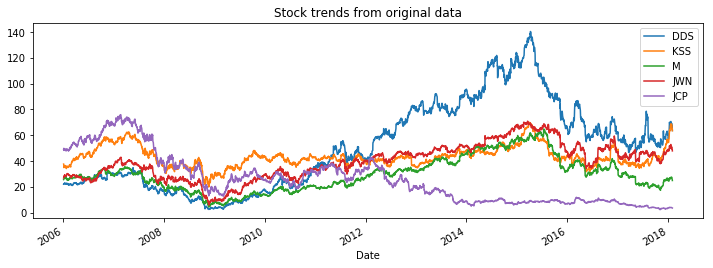

In [6]:
#Evaluate the stock trends from original data
adj_close_px.plot(figsize=(12,4),title='Stock trends from original data')

As seen from the chart for 'Stock trends from original data' , all five of the retail businesses have suffered from 2007-2009 recesion. Then stocks have picked up from in rising trends from most of the retailers from 2009 till 2011 and then stabilize for another year

In [7]:
#Resample the data for business day frequency with resample rule 'B'
adj_close_px = adj_close_px.resample('B').ffill()
adj_close_px.head()

,DDS,KSS,M,JWN,JCP
Date,,,,,
2006-01-03,22.047258,37.614716,25.586136,26.887373,49.139057
2006-01-04,22.307863,37.305038,25.904921,26.851738,49.818050
2006-01-05,22.264427,34.891087,25.979937,28.277367,48.233749
2006-01-06,22.134123,35.335777,26.238722,28.156185,48.848843
2006-01-09,22.716145,35.240486,26.917572,28.583870,48.944798


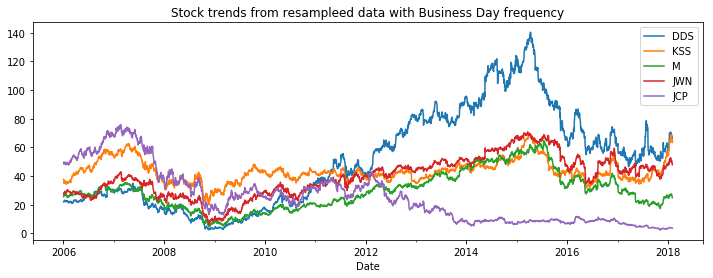

In [8]:
#Evaluate the stock trends from resample data
adj_close_px.plot(figsize=(12,4),title='Stock trends from resampleed data with Business Day frequency')

From the chart 'Stock trends from resampled data with Business Day Frequency', it is still evident that JCP stock for JCPenny has suffered from recesion of 2007-2009 and then rised again for next couple of year until 2012. Then it has started declining again. However, on the other side DDS for Dillard's has been rising up after recovery from recesion period until around 2015, and then it has joined the group of retailers who have sustained themselves after recession, for example Macys (M), Kohl's (KSS) and Nordstorm (JWN). One more interesting fact is the Kohl's (KSS) was minimally damages during the recession period of 2007-2009, and it is able to maintained its stock prices least variations than other retailers involved in this report.  

## Momentum Strategy to eliminate hot vesus cold stocks 

For next couple of steps I will focus on rolling means and standard deviation for three stocks to compare hot, cold and maintained stocks that is Dillard's (DDS), JCPenny (JCP) and Kohl's (KSS) respectively.

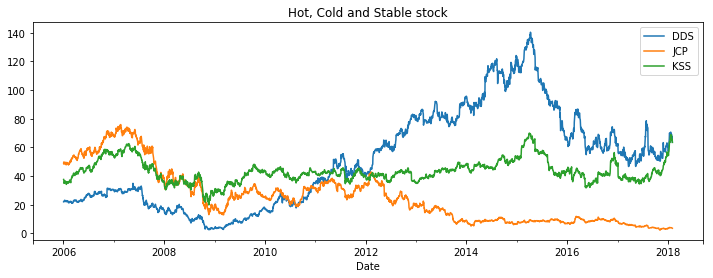

In [9]:
#Evaluate the stock for DDS, JCP and KSS
hot_cold_stable_px = adj_close_px[['DDS','JCP','KSS']]
hot_cold_stable_px.plot(figsize=(12,4), title='Hot, Cold and Stable stock')

From the chart 'Hot, Cold and Stable stock' it is evident that Kohl's has been able to stabilize the stock before and after recession and even during recession, it was the least impacted stock. Next I will evaluate the stocks based on quarterly summary.


C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


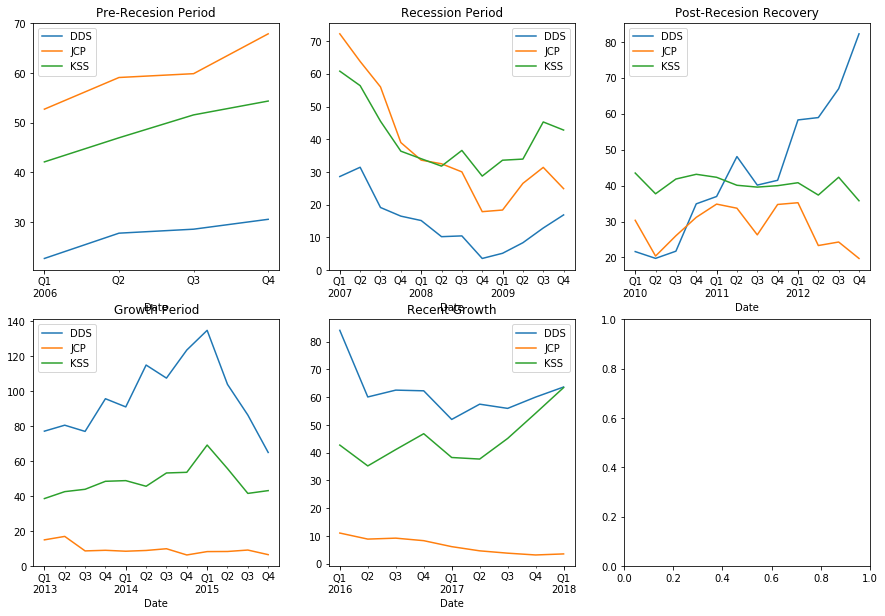

In [10]:
# Check the trends for Quarterly end of frequency sample
hot_cold_stable_q = hot_cold_stable_px.resample('Q-DEC').ffill()
fig, axes = plt.subplots(nrows=2,ncols=3,sharex=False,sharey=False,figsize=(15,10))
hot_cold_stable_q.ix[:'2006'].plot(ax=axes[0][0],title='Pre-Recesion Period')
hot_cold_stable_q.ix['2007':'2009'].plot(ax=axes[0][1],title='Recession Period')
hot_cold_stable_q.ix['2010':'2012'].plot(ax=axes[0][2],title='Post-Recesion Recovery')
hot_cold_stable_q.ix['2013':'2015'].plot(ax=axes[1][0],title='Growth Period')
hot_cold_stable_q.ix['2016':].plot(ax=axes[1][1],title='Recent Growth')

From the quarterly stock chart as shown above, it is evident that JCPenny (JCP) has some tough time to recover back to the original stock price reported between USD 50 and USD 60 before recession in 2016. So I can consider it as a cold stock. On the other hand, Dillards (DDS) has been growing tremendously recovering from recession period and moving forward. DDS was between USD 20 and USD 30 before recession and it has been closed between USD 60 and USD 70 in the last quarter of 2016 with the hisghest stock reaching between USD 80 and USD 90 in first quarter of 2016. Last but not least, Kohl's (KSS) has been stable through out the decase. It was the least impacted stock during the recession period. It has also closed between USD 40 and USD 50 in last quarter of 2016 and this was the range of stock price for Kohl's in fist quarter of 2006.

Next, I will compare between Kohl's(KSS) and Dillard's(DDS) to evaluate which one would be the actual hot riding stock by analyzing rolling mean and standard deviation trends for post recession period.

Text(0.5,1,u"Kohl's actual stocks and Rolling mean")

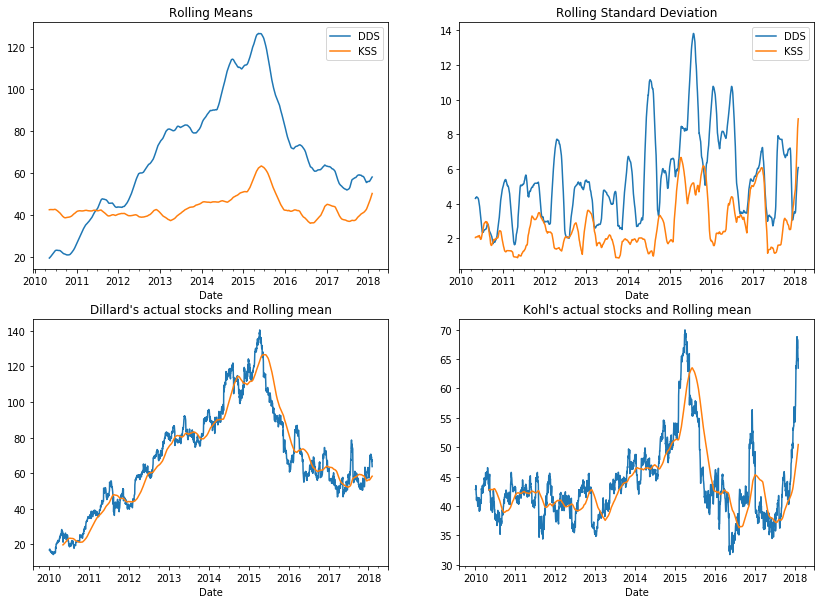

In [11]:
# Computing and plotting rolling means and standard deviations over 90 day window
period = 90
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(14,10))
post_recession_hot_px_mean = adj_close_px['2010':][['DDS','KSS']].rolling(window=period,center=False).mean()
post_recession_hot_px_sd = adj_close_px['2010':][['DDS','KSS']].rolling(window=period,center=False).std()
post_recession_hot_px_mean.plot(ax=axes[0][0], title = 'Rolling Means')
post_recession_hot_px_sd.plot(ax=axes[0][1], title = 'Rolling Standard Deviation')
adj_close_px['2010':].DDS.plot(ax=axes[1][0])
post_recession_hot_px_mean.DDS.plot(ax=axes[1][0])
adj_close_px['2010':].KSS.plot(ax=axes[1][1])
post_recession_hot_px_mean.KSS.plot(ax=axes[1][1])
axes[1][0].set_title('Dillard\'s actual stocks and Rolling mean')
axes[1][1].set_title('Kohl\'s actual stocks and Rolling mean')

From the charts listed above for Dillard's (DDS) and Kohl's(KSS), it is evident that Dillard's DDS is the hot rising stock until 2016. Starting 2016, both Dillard's and Kohl's have been struggling to maintain the stock, along with other retailers Macy's (M) and Nordstorm (JWN) that has been covered in the report ealier. So, there might be other factors involved starting 2015. 

## Further Analysis of Rising Hot stock 

For the continuation of this report I will take Dillard's DDS as a hot rising stock and cover the report for time period from 2010 to 2014.

In [12]:
expanding_mean=lambda x : rolling_mean(x,len(x),min_periods=1)

C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=50,window=60,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
  """


Text(0.5,1,u"Dillard's - Exponentially-weighted MA")

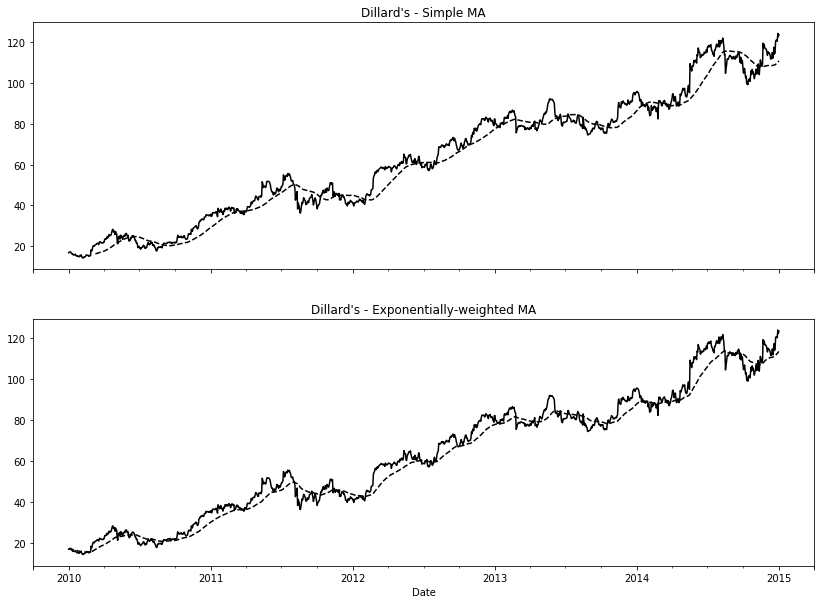

In [13]:
# calucating and plotting rolling mean average and exponentially weighted mean average over 60 day period
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(14,10))
dds_px = adj_close_px.DDS['2010':'2014']
ma60=pd.rolling_mean(dds_px,60,min_periods=50)
ewma60=pd.ewma(dds_px,span=60)
dds_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--',ax=axes[0])
dds_px.plot(style='k-',ax=axes[1])
ewma60.plot(style='k--',ax=axes[1])
axes[0].set_title('Dillard\'s - Simple MA')
axes[1].set_title('Dillard\'s - Exponentially-weighted MA')

From the charts list above, it is evident that Dillard's stock has an steady growth for the time period starting at 2010 and ending in the last quarter of 2014.

Analyze the coorelation of Retail stocks for Dillards with S&P 500.

C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=125).corr(other=<Series>)
  """


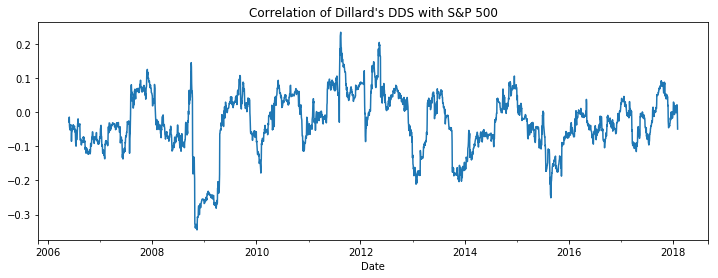

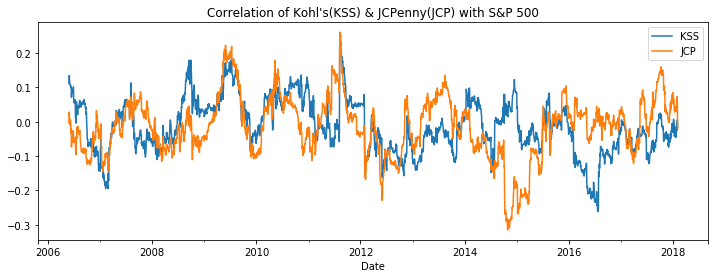

In [14]:
#Computing and plotting correlation matrix with S&P 500 for selected retail stocks as DDS, KSS, and JCP
spy_px=stocks['Adj Close'][S_and_P].SPY
spy_rets=spy_px/spy_px.shift(1)-1
returns=adj_close_px.pct_change()
corr=pd.rolling_corr(returns[['DDS','KSS','JCP']],spy_rets,125,min_periods=100)
corr.DDS.plot(figsize=(12,4), title='Correlation of Dillard\'s DDS with S&P 500')
corr[['KSS','JCP']].plot(figsize=(12,4), title='Correlation of Kohl\'s(KSS) & JCPenny(JCP) with S&P 500')

Analyzing Dillard's stock with custom defined function for rolling value of percentile over 90 day period

C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


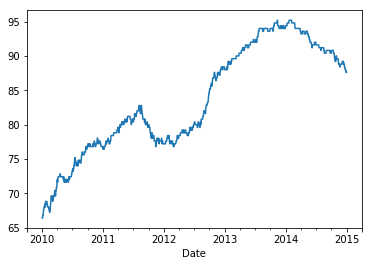

In [15]:
#Define a custom function for calculating rolling value of percentile over 250 day period
score_at_2percent= lambda x: percentileofscore(x,0.02)
result=pd.rolling_apply(returns.DDS,250,score_at_2percent)
result['2010':'2014'].plot()

# Sharpe Ratio Calculation

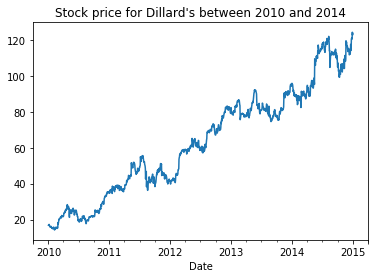

In [16]:
#peparing data for Dillard's (DDS) for sharpe ratio calculation
dds_price=adj_close_px.DDS
#capture data trend where it was most stable
dds_price['2010':'2014'].plot(title='Stock price for Dillard\'s between 2010 and 2014' )

In [17]:
dds_price['2014-10-01']/dds_price['2014-06-04']-1

-0.07986588585821719

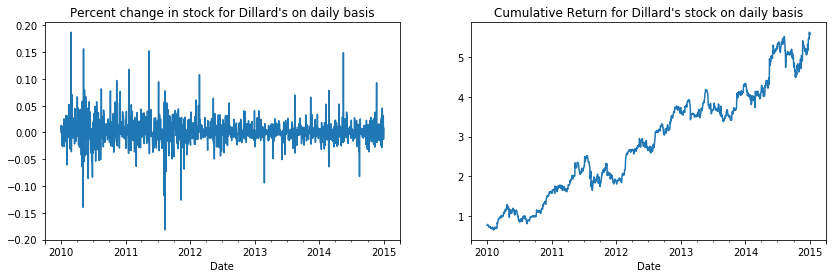

In [18]:
#Acquiring percent change per day and cumulative returns on compound product
returns = dds_price.pct_change()
ret_index = (1+returns).cumprod()
ret_index[0]=1
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False,figsize=(14,4))
returns['2010':'2014'].plot(ax=axes[0],title='Percent change in stock for Dillard\'s on daily basis')
ret_index['2010':'2014'].plot(ax=axes[1], title='Cumulative Return for Dillard\'s stock on daily basis')

From the chart list above for percent change in stock and cumulative product for Dillard's on daily basis, as the percante change between 2012 and 2014 was mostly between 0.05, complementing with the steady growth in stock pricess during the same time period.

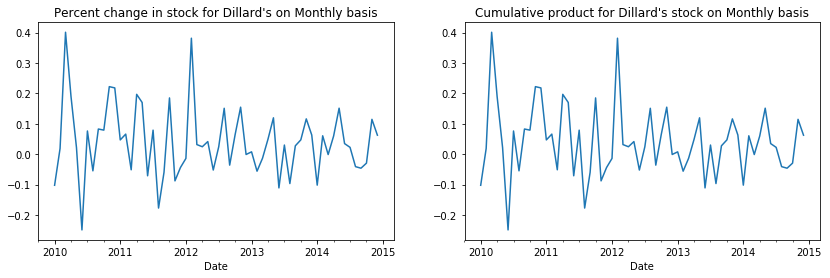

In [19]:
#Acquiring percent change per month and product
m_returns = ret_index.resample('M').last().pct_change()
m_rets = (1 + returns).resample('M',kind='period').prod()-1
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False,figsize=(14,4))
m_returns['2010':'2014'].plot(ax=axes[0],title='Percent change in stock for Dillard\'s on Monthly basis')
m_rets['2010':'2014'].plot(ax=axes[1], title='Cumulative product for Dillard\'s stock on Monthly basis')

From above charts, the monthly percent change and product being stable mostly between 0.1 and 0.2 

First define couple of methods to compute daily returns and lagged moving sum as reference from the book 'Python for Data Analysis' by Wes Mckinney

In [20]:
# method to calculate daily returns 
def to_index(rets):
    index = (1+rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax())-1,0)
    index.values[first_loc]=1
    return index

In [21]:
# method to compute lagged moving sum
def trend_signal(rets, lookback, lag):
    signal = pd.rolling_sum(rets, lookback, min_periods=lookback - 5)
    return signal.shift(lag)

Next, I have calculated the Trade strategy for Dillard's for the time period of 2010 to 2014. The reference has been taken form book 'Python for Data Analysis' by Wes Mckinney

C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=95,window=100,center=False).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


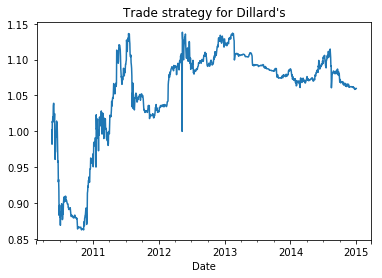

In [22]:
#calculate and plot trade strategy for business day
signal = trend_signal(returns['2010':'2014'], 100, 3)
trade = signal.resample('B').ffill()
trade_rets =  trade.shift(1)*returns['2010':'2014']
trade_rets = trade_rets[:len(returns['2010':'2014'])]
to_index(trade_rets).plot(title='Trade strategy for Dillard\'s')

Following from trade strategy, now Sharpe ratio can be calculated as following. The reference has been taken form book 'Python for Data Analysis' by Wes Mckinney

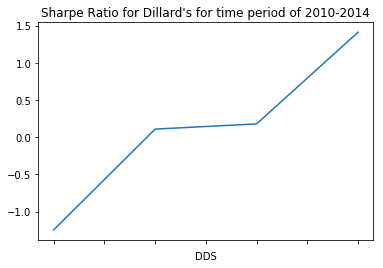

In [23]:
# Calculating Shape ratio
vol = returns['2010':'2014'].rolling(250, min_periods=200).std()

def sharpe(rets, ann=250):
    return rets.mean()/rets.std()*np.sqrt(ann)

trade_rets.groupby(pd.qcut(vol,4)).agg(sharpe).plot(title='Sharpe Ratio for Dillard\'s \
for time period of 2010-2014')

## Signal Frontier Analysis

Next I have used Signal Frontier Analysis. The reference has been taken from The reference has been taken form book 'Python for Data Analysis' by Wes Mckinney

In [24]:
# prepare data for business day frequency for the years from 2010 to 2014
px = adj_close_px['2010':'2014'].asfreq('B').fillna(method='pad')
px.head()

,DDS,KSS,M,JWN,JCP
Date,,,,,
2010-01-01,16.877916,42.823769,13.598764,29.105663,24.908689
2010-01-04,17.097464,42.863476,13.842179,29.368986,25.423519
2010-01-05,17.198088,42.895237,13.679903,28.912046,25.442240
2010-01-06,17.353607,43.451080,13.874635,28.989492,26.045767
2010-01-07,16.923653,42.450562,14.191072,30.151241,25.281929


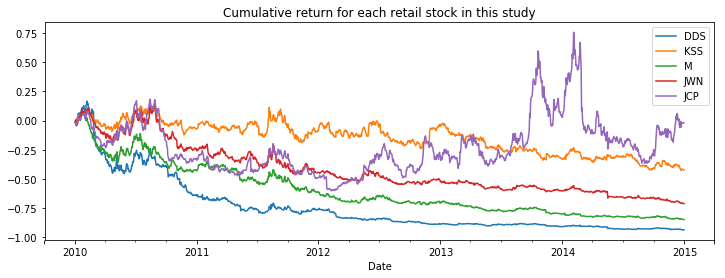

In [25]:
#calculate return and cumulative return
rets = px.pct_change()
ret_index = (1-rets).cumprod()-1
ret_index.plot(figsize=(12,4), title='Cumulative return for each retail stock in this study')

First I am going to setup the helper functions and calculation for calculating Sharpe Ratio using Frontier Signal Analysis. 

In [26]:
# method for computing mean reversion over a given lookback
def calc_mom(price, lookback, lag):
    # case when prices  has sent as series
    if type(price) is pd.core.series.Series:
        mom_ret = price.shift(lag).pct_change(lookback)
        ranks = mom_ret.rank(ascending=False)
        demeanded = ranks.subtract(ranks.mean(),axis=0)
        return demeanded.divide(demeanded.std(),axis=0)
    else: # case when prices has sent as dataframe
        mom_ret = price.shift(lag).pct_change(lookback)
        ranks = mom_ret.rank(axis=1, ascending=False)
        demeanded = ranks.subtract(ranks.mean(axis=1),axis=0)
        return demeanded.divide(demeanded.std(axis=1),axis=0)

In [27]:
#Custom function for returning compound product
compound = lambda x:(1+x).prod()-1
#Customer function for daily sharpe ratio
daily_sr = lambda x: x.mean()/x.std()

In [28]:
# method for setting strategy for Sharpe Ratio
def strat_sr(prices, lb, hold):
    #Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)
    daily_rets = prices.pct_change()
    
    #compute portfolio returns
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq, how=compound)
    # case when prices  has sent as series
    if type(prices) is pd.core.series.Series:
        port_rets = (port*returns).sum()
    else: # case when prices has sent as dataframe
        port_rets = (port*returns).sum(axis=1)
    # case when prices  has sent as series
    if type(prices) is pd.core.series.Series:
        return port_rets*np.sqrt(252/hold)
    else: # case when prices has sent as dataframe
        return daily_sr(port_rets)*np.sqrt(252/hold)

In [29]:
#testing the custom functions
strat_sr(px, 70, 30)

C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  # Remove the CWD from sys.path while we load stuff.


0.027088981357904007

In [30]:
def calculateAndStoreSharpeRatio(prices, lookbacks,holdings):
    dd = defaultdict(dict)
    for lb in lookbacks:
        for hold in holdings:
            dd[lb][hold]=strat_sr(prices,lb,hold)
    return dd

In [31]:
# Generate a heat map for Shape ratio being calcualted over different lookback and holding periods
def heatmap(df, title_str, cmap=plt.cm.Spectral_r):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    axim=ax.imshow(df.values,aspect='auto', cmap=cmap,interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)
    plt.title(title_str)

In [32]:
# Now calculate sharpe ratio for given lookback and holdings period between 2010 and 2014
lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
#calcuate Sharpe Ratio for all the stocks
dd_all = calculateAndStoreSharpeRatio(px, lookbacks,holdings)
ddf_all = pd.DataFrame(dd_all)
ddf_all.index.name = 'Holding Period'
ddf_all.columns.name = 'Lookback Period'

#Calculate Sharpe Ratio for Dillard's stock only
dd_dds = calculateAndStoreSharpeRatio(px.DDS, lookbacks,holdings)
ddf_dds = pd.DataFrame(dd_dds)
ddf_dds.index.name = 'Holding Period'
ddf_dds.columns.name = 'Lookback Period'

C:\Users\shazia\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  # Remove the CWD from sys.path while we load stuff.


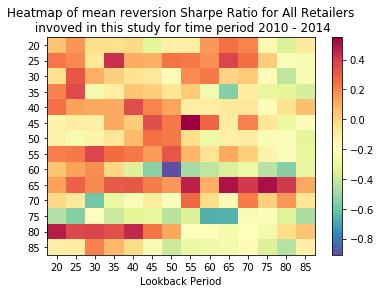

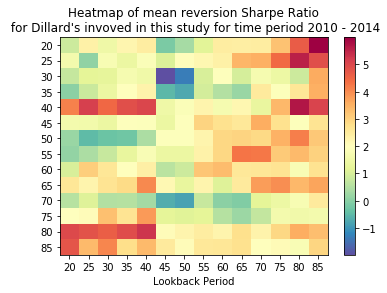

In [33]:
title_str_all='Heatmap of mean reversion Sharpe Ratio for All Retailers\n invoved in this study\
 for time period 2010 - 2014'
heatmap(ddf_all, title_str_all)
title_str_dds='Heatmap of mean reversion Sharpe Ratio\n for Dillard\'s invoved in this study\
 for time period 2010 - 2014'
heatmap(ddf_dds, title_str_dds)

From the chart above for 'Heatmap of mean reversion Sharpe Ratio for All Retailers', it is evident that Sharpe ratio is at the peak at (lookback,holding) period combination as (55,45), (55,65), (65,65) and (75,65). From the chart for 'Heatmap of mean reversion Sharpe Ratio for Dillard' (20,80),(80,40) and (85,20).